In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime, date, timedelta
from statsmodels.tsa.stattools import coint, adfuller
from statsmodels.regression.linear_model import OLS
from scipy.stats import norm
%matplotlib inline

In [2]:
# Define function to collect data from Yahoo Finance
def get_data(ticker, start_date, end_date, period = '1d'):
    data = yf.download(ticker, start=start_date, end=end_date, interval=period)
    data = data.dropna()
    return data


# Define a list of assets
assets = ['MCHI', 'TCEHY', 'BABA', 'TME', 'HG=F', 'CL=F', 'BZ=F', 'GC=F', 'SI=F', 'RACE', 'TSLA', '^TNX', '^HSI', '^GSPC', '^VIX', '^IRX', 'AAPL','AMZN','GOOGL','MSFT','JPM','V','NVDA','BAC','WMT','XOM','SPY','QQQ','VTI','IWM','GLD','VWO','EFA','XLF','XLU','USO']
#,'UNG','UGA','CORN','SOYB','WEAT','JO','COW','JJG','GLTR','ADBE','CTSH','CDW','FISV','FTNT','PGR','ROL','TTWO','IJR','MDY','VOE','VOT','IWP','IWS','JKH','IVOO','MDYG','PSA','EQR','VNO','REG','SPG','PLD','ICE','SYF','AXP','DFS','MCO','SCHW','CINF','RJF','PDD','NTES','HDB','ITUB','EEM','JCI','IPC']

# Collect data for related assets
start_date = datetime(2015, 1, 1)
end_date = date.today() - timedelta(days=1)

# Collect data for all assets and store in a dictionary
data = {}
for asset in assets:
    data[asset] = get_data(asset, start_date, end_date)['Close']

# Merge data for all assets into a single DataFrame
merged_data = pd.concat(data, axis=1, keys=data.keys())
# Drop rows with any NA values
merged_data = merged_data.dropna(how='any')
merged_data.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,MCHI,TCEHY,BABA,TME,HG=F,CL=F,BZ=F,GC=F,SI=F,RACE,...,SPY,QQQ,VTI,IWM,GLD,VWO,EFA,XLF,XLU,USO
Date,,,,,,,,,,,,,,,,,,,,,
2023-07-06,43.990002,41.189999,83.839996,7.21,3.7200,71.800003,76.519997,1908.699951,22.686001,313.529999,...,439.660004,367.459991,218.309998,182.779999,177.309998,40.099998,70.370003,33.540001,65.870003,64.440002
2023-07-07,44.919998,42.880001,90.550003,7.25,3.7670,73.860001,78.470001,1926.199951,23.091999,314.489990,...,438.549988,366.239990,218.039993,184.710007,178.639999,40.580002,70.900002,33.590000,65.389999,65.849998
2023-07-10,44.930000,42.410000,90.559998,7.31,3.7715,72.989998,77.690002,1925.000000,23.150999,318.290009,...,439.660004,366.359985,218.990005,187.869995,178.779999,40.590000,71.099998,33.740002,65.110001,65.540001
2023-07-11,45.310001,43.060001,91.790001,7.53,3.7535,74.830002,79.400002,1931.300049,23.086000,318.390015,...,442.459991,368.170013,220.710007,189.800003,179.449997,40.950001,71.739998,34.139999,65.919998,67.029999
2023-07-12,46.490002,44.810001,94.000000,7.79,3.8420,75.750000,80.110001,1956.199951,24.118999,322.679993,...,446.019989,372.820007,222.399994,191.869995,181.880005,41.730000,73.110001,34.360001,66.879997,67.870003


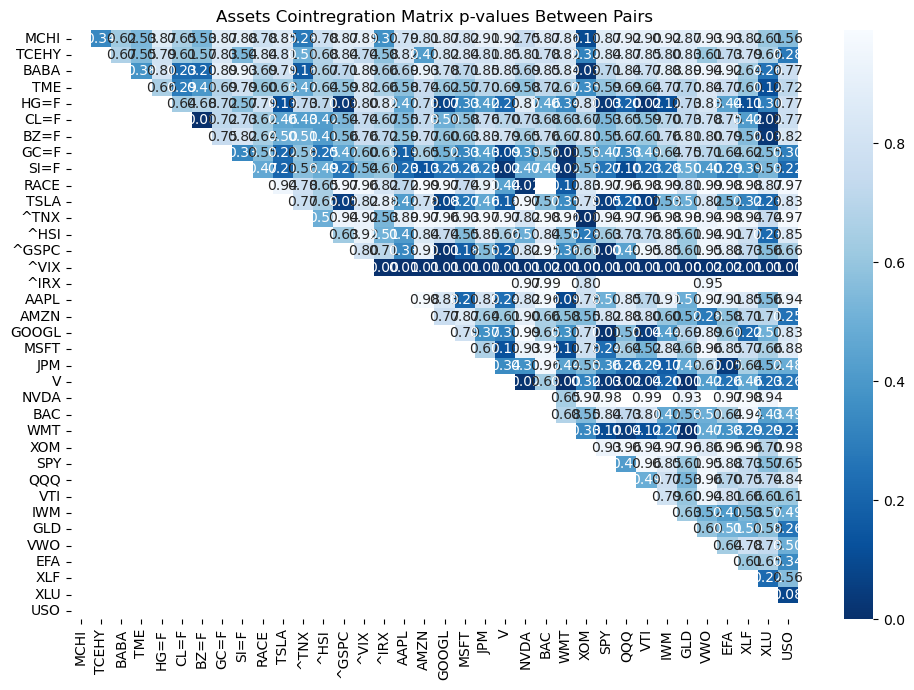

[('BABA', 'XOM'), ('HG=F', '^GSPC'), ('HG=F', 'SPY'), ('HG=F', 'VTI'), ('CL=F', 'BZ=F'), ('CL=F', 'XLU'), ('BZ=F', 'XLU'), ('GC=F', 'WMT'), ('SI=F', 'V'), ('SI=F', 'WMT'), ('RACE', 'NVDA'), ('^TNX', 'XOM'), ('^GSPC', 'GOOGL'), ('^GSPC', 'SPY'), ('^VIX', '^IRX'), ('^VIX', 'AAPL'), ('^VIX', 'AMZN'), ('^VIX', 'GOOGL'), ('^VIX', 'MSFT'), ('^VIX', 'JPM'), ('^VIX', 'V'), ('^VIX', 'NVDA'), ('^VIX', 'BAC'), ('^VIX', 'WMT'), ('^VIX', 'XOM'), ('^VIX', 'SPY'), ('^VIX', 'QQQ'), ('^VIX', 'VTI'), ('^VIX', 'IWM'), ('^VIX', 'GLD'), ('^VIX', 'VWO'), ('^VIX', 'EFA'), ('^VIX', 'XLF'), ('^VIX', 'XLU'), ('^VIX', 'USO'), ('GOOGL', 'SPY'), ('GOOGL', 'VTI'), ('JPM', 'EFA'), ('V', 'NVDA'), ('V', 'WMT'), ('V', 'SPY'), ('V', 'QQQ'), ('V', 'VTI'), ('V', 'GLD'), ('WMT', 'QQQ'), ('WMT', 'GLD')]


In [3]:
def cointegration(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs

# calculate p-values and plot as a heatmap
pvalues, pairs = cointegration(merged_data)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(pvalues, xticklabels = merged_data.columns,
                yticklabels = merged_data.columns, cmap = 'Blues_r', annot = True, fmt=".2f",
                mask = (pvalues >= 0.99))
ax.set_title('Assets Cointregration Matrix p-values Between Pairs')
plt.tight_layout()
plt.show()
print(pairs)

In [4]:
# Create a DataFrame from pvalues
df_pvalues = pd.DataFrame(pvalues, index=merged_data.columns, columns=merged_data.columns)
# Drop values above 0.05
df_pvalues = df_pvalues.mask(df_pvalues >= 0.05)
df_pvalues

,MCHI,TCEHY,BABA,TME,HG=F,CL=F,BZ=F,GC=F,SI=F,RACE,...,SPY,QQQ,VTI,IWM,GLD,VWO,EFA,XLF,XLU,USO
MCHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCEHY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BABA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HG=F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.471518e-02,NaN,0.016507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CL=F,NaN,NaN,NaN,NaN,NaN,NaN,0.000555,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016996,NaN
BZ=F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032687,NaN
GC=F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SI=F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


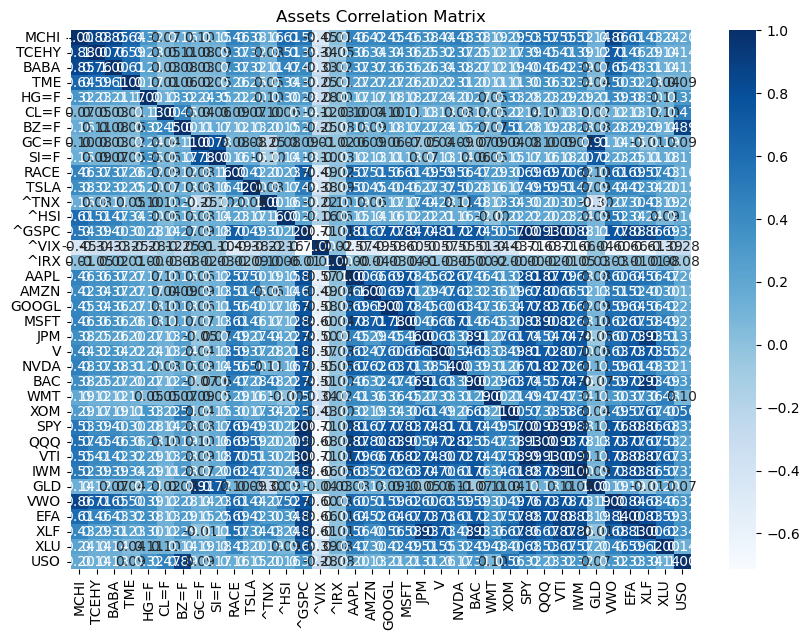

In [5]:
# Pearson correlation to get the basic idea about the relationship
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(merged_data.pct_change().corr(method ='pearson'), ax=ax, cmap='Blues', annot=True, fmt=".2f") #spearman
ax.set_title('Assets Correlation Matrix')
plt.show();

In [6]:
stacked_df = df_pvalues.stack().reset_index()

# Rename the columns
stacked_df.columns = ['Asset1', 'Asset2', 'P-value']

# Drop rows with NaN p-values
stacked_df = stacked_df.dropna(subset=['P-value'])

# Reset the index
stacked_df = stacked_df.reset_index(drop=True)
stacked_df

,Asset1,Asset2,P-value
0,BABA,XOM,2.610687e-02
1,HG=F,^GSPC,3.446308e-02
2,HG=F,SPY,3.471518e-02
3,HG=F,VTI,1.650701e-02
4,CL=F,BZ=F,5.553435e-04
5,CL=F,XLU,1.699552e-02
6,BZ=F,XLU,3.268712e-02
7,GC=F,WMT,1.181367e-02
8,SI=F,V,2.387825e-02
9,SI=F,WMT,2.225171e-02


In [7]:
# List to store the results
results = []

# Loop over all assets
for asset1 in stacked_df['Asset1']:
    for asset2 in stacked_df['Asset2']:
        # Skip if asset1 is the same as asset2
        if asset1 == asset2:
            continue
        
        # Fit the OLS model
        model = sm.OLS(merged_data[asset2][-60:], merged_data[asset1][-60:]).fit()
        spread = merged_data[asset2] - model.params[0] * merged_data[asset1]
        adf = adfuller(spread, maxlag = 1)
        adf_one_pct = adf[4]['1%']
        # Store the result in the list
        results.append((asset1, asset2, adf[0], adf_one_pct))

results = pd.DataFrame(results)
results[4] = results.apply(lambda row: 'Y' if row[2] < row[3] else None, axis=1)
# Drop rows where '4' is not 'Y'
results.dropna(subset=[4], inplace=True)
results = results.drop([2,3,4], axis=1)
results = results.rename(columns={0: 'Asset1', 1: 'Asset2'})
results = results.drop_duplicates()
results

,Asset1,Asset2
188,CL=F,BZ=F
328,GC=F,WMT
329,GC=F,V
350,GC=F,GLD
552,^GSPC,SPY
646,^VIX,XLU
648,^VIX,WMT
649,^VIX,V
657,^VIX,AMZN
670,^VIX,GLD


In [8]:
for index, row in results.iterrows():
    # Get the asset names from the row
    asset1_lp = row['Asset1']
    asset2_lp = row['Asset2']
    # Create a dataframe of 2 assets
    arbit_df_lp = pd.DataFrame()
    arbit_df_lp['asset1'] = merged_data[asset1_lp]
    arbit_df_lp['asset2'] = merged_data[asset2_lp]

    # calculate z-score
    def zscore(series):
        return (series - series.mean()) / np.std(series)

    # create a dataframe for trading signals
    signals_lp = pd.DataFrame()
    signals_lp['asset1'] = arbit_df_lp['asset1']
    signals_lp['asset2'] = arbit_df_lp['asset2']
    ratios_lp = signals_lp.asset1 / signals_lp.asset2

    # calculate z-score and define upper and lower thresholds
    signals_lp['z'] = zscore(ratios_lp)
    signals_lp['z upper limit'] = np.mean(signals_lp['z']) + np.std(signals_lp['z'])
    signals_lp['z lower limit'] = np.mean(signals_lp['z']) - np.std(signals_lp['z'])
    # create signal - short if z-score is greater than upper limit else long
    signals_lp['signals1'] = 0
    signals_lp['signals1'] = np.select([signals_lp['z'] > \
                                     signals_lp['z upper limit'], signals_lp['z'] < signals_lp['z lower limit']], [-1, 1], default=0)
    # we take the first order difference to obtain portfolio position in that stock
    signals_lp['positions1'] = signals_lp['signals1'].diff()
    signals_lp['signals2'] = -signals_lp['signals1']
    signals_lp['positions2'] = signals_lp['signals2'].diff()

    # initial capital to calculate the actual pnl
    initial_capital_lp = 50000

    # shares to buy for each position
    positions1_lp = initial_capital_lp// max(signals_lp['asset1'])
    positions2_lp = initial_capital_lp// max(signals_lp['asset2'])

    # since there are two assets, we calculate each asset Pnl 
    # separately and in the end we aggregate them into one portfolio
    portfolio_lp = pd.DataFrame()
    portfolio_lp['asset1'] = signals_lp['asset1']
    portfolio_lp['holdings1'] = signals_lp['positions1'].cumsum() * signals_lp['asset1'] * positions1_lp
    portfolio_lp['cash1'] = initial_capital_lp - (signals_lp['positions1'] * signals_lp['asset1'] * positions1_lp).cumsum()
    portfolio_lp['total asset1'] = portfolio_lp['holdings1'] + portfolio_lp['cash1']
    # pnl for the 2nd asset
    portfolio_lp['asset2'] = signals_lp['asset2']
    portfolio_lp['holdings2'] = signals_lp['positions2'].cumsum() * signals_lp['asset2'] * positions2_lp
    portfolio_lp['cash2'] = initial_capital_lp - (signals_lp['positions2'] * signals_lp['asset2'] * positions2_lp).cumsum()
    portfolio_lp['total asset2'] = portfolio_lp['holdings2'] + portfolio_lp['cash2']
    # total pnl
    portfolio_lp['total asset'] = portfolio_lp['total asset1'] + portfolio_lp['total asset2']
    portfolio_lp = portfolio_lp.dropna()

    # calculate terminal wealth
    final_portfolio_lp = portfolio_lp['total asset'].iloc[-1]
    results.at[index, 'Terminal Wealth'] = round(final_portfolio_lp, 2)

In [9]:
results

,Asset1,Asset2,Terminal Wealth
188,CL=F,BZ=F,106810.38
328,GC=F,WMT,168359.44
329,GC=F,V,160200.21
350,GC=F,GLD,134699.85
552,^GSPC,SPY,106010.92
646,^VIX,XLU,139388.00
648,^VIX,WMT,149546.73
649,^VIX,V,154865.02
657,^VIX,AMZN,146248.24
670,^VIX,GLD,142443.39


In [10]:
# Sort the results DataFrame by terminal wealth in descending order
sorted_results = results.sort_values(by='Terminal Wealth', ascending=False)
sorted_results

,Asset1,Asset2,Terminal Wealth
328,GC=F,WMT,168359.44
2011,WMT,V,164048.59
2030,WMT,GLD,163584.00
1747,V,WMT,161070.00
329,GC=F,V,160200.21
649,^VIX,V,154865.02
1767,V,GLD,154096.59
648,^VIX,WMT,149546.73
657,^VIX,AMZN,146248.24
670,^VIX,GLD,142443.39


In [11]:
# Create a new DataFrame with the highest terminal wealh assets
high_tw = pd.DataFrame({
    'Asset1': [sorted_results.iloc[0][0]],
    'Asset2': [sorted_results.iloc[0][1]],
    'Terminal_Wealth': [sorted_results.iloc[0][2]]
})
high_tw

,Asset1,Asset2,Terminal_Wealth
0,GC=F,WMT,168359.44


In [12]:
# final pair to test strategy
asset1 = high_tw.iloc[0][0]
asset2 = high_tw.iloc[0][1]
# create a dataframe of 2 assets
arbit_df = pd.DataFrame()
arbit_df['asset1'] = merged_data[asset1]
arbit_df['asset2'] = merged_data[asset2]

Hedge Ratio =  0.07710830202042103


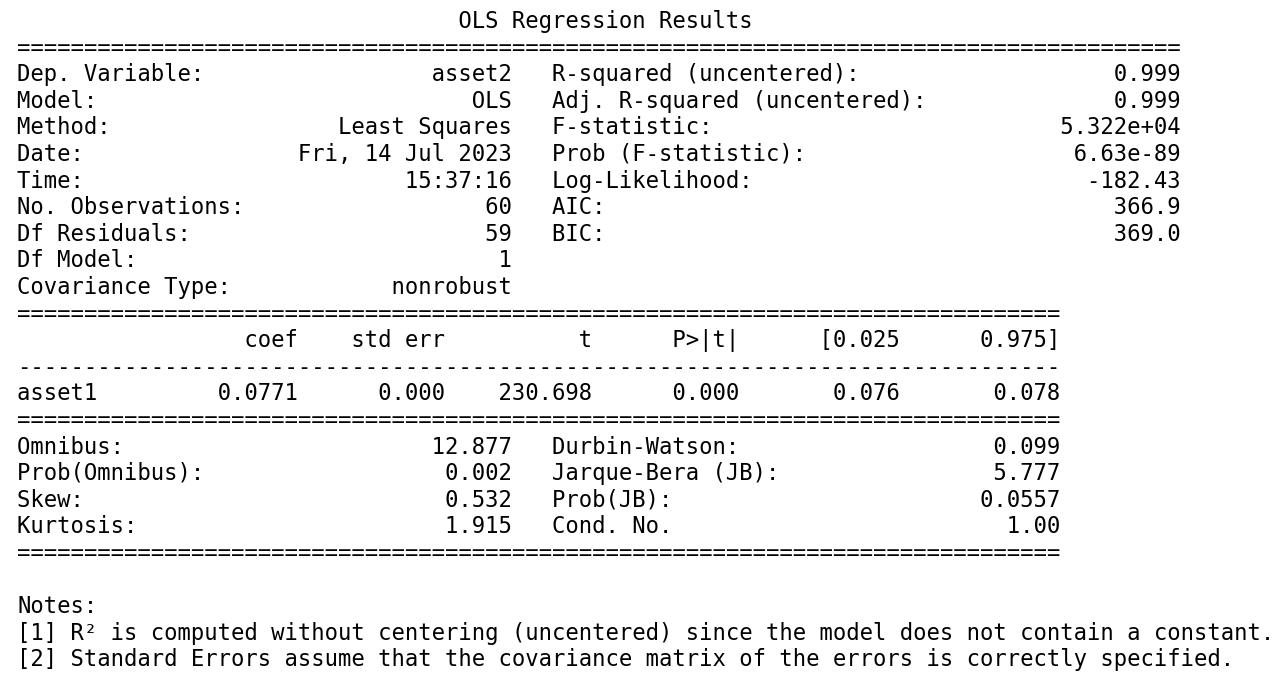

In [13]:
# run OLS regression
model=sm.OLS(arbit_df.asset2[-60:], arbit_df.asset1[-60:]).fit()
# print regression summary results
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 16}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.7, bottom=0.1);
print('Hedge Ratio = ', model.params[0])

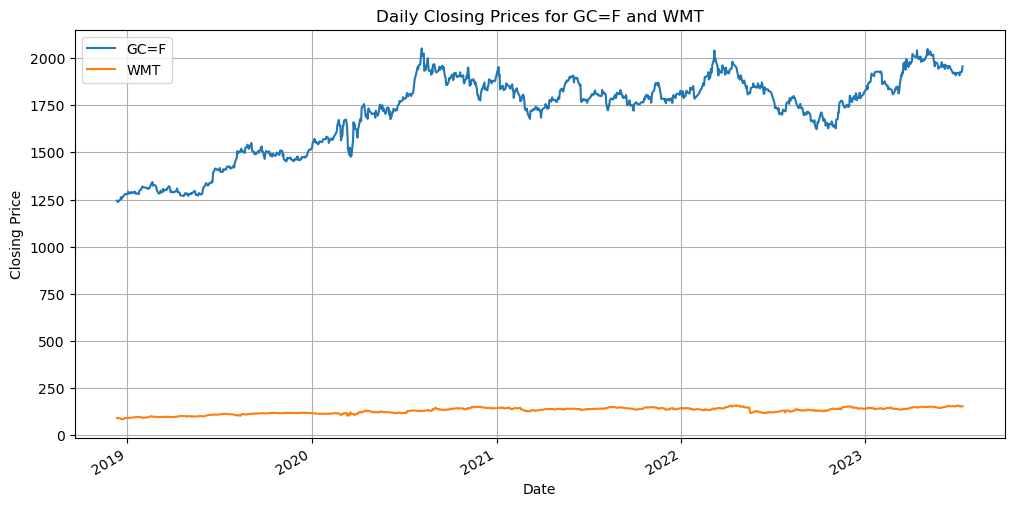

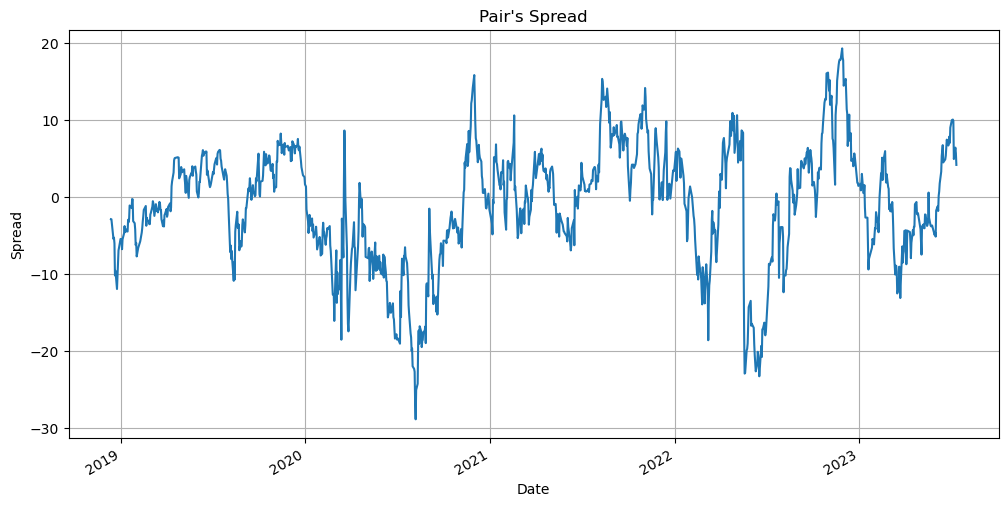

Critical Value =  -4.720401430367778
{'1%': -3.4363470029475525, '5%': -2.864187948086107, '10%': -2.568179853605536}


In [14]:
# visualize closing prices
ax = arbit_df[['asset1','asset2']].plot(figsize=(12, 6), title = 'Daily Closing Prices for {} and {}'.format(asset1,asset2))
ax.set_ylabel("Closing Price")
ax.grid(True)
ax.legend([asset1,asset2])
plt.show()
# calculate spread
spread = arbit_df.asset2 - model.params[0] * arbit_df.asset1
# Plot the spread
ax = spread.plot(figsize=(12, 6), title = "Pair's Spread")
ax.set_ylabel("Spread")
ax.grid(True)
plt.show()
# conduct Augmented Dickey-Fuller test
adf = adfuller(spread, maxlag = 1)
print('Critical Value = ', adf[0])
# probablity critical values
print(adf[4])

In [15]:
# calculate z-score
def zscore(series):
    return (series - series.mean()) / np.std(series)

# create a dataframe for trading signals
signals = pd.DataFrame()
signals['asset1'] = arbit_df['asset1']
signals['asset2'] = arbit_df['asset2']
ratios = signals.asset1 / signals.asset2

# calculate z-score and define upper and lower thresholds
signals['z'] = zscore(ratios)
signals['z upper limit'] = np.mean(signals['z']) + np.std(signals['z'])
signals['z lower limit'] = np.mean(signals['z']) - np.std(signals['z'])
# create signal - short if z-score is greater than upper limit else long
signals['signals1'] = 0
signals['signals1'] = np.select([signals['z'] > \
                                 signals['z upper limit'], signals['z'] < signals['z lower limit']], [-1, 1], default=0)
# we take the first order difference to obtain portfolio position in that stock
signals['positions1'] = signals['signals1'].diff()
signals['signals2'] = -signals['signals1']
signals['positions2'] = signals['signals2'].diff()
# verify datafame head and tail
pd.concat([signals.head(3), signals.tail(3)])

,asset1,asset2,z,z upper limit,z lower limit,signals1,positions1,signals2,positions2
Date,,,,,,,,,
2018-12-12,1244.400024,93.110001,0.333656,1.0,-1.0,0,NaN,0,NaN
2018-12-13,1242.699951,92.959999,0.337860,1.0,-1.0,0,0.0,0,0.0
2018-12-14,1237.000000,91.849998,0.465480,1.0,-1.0,0,0.0,0,0.0
2023-07-10,1925.000000,154.880005,-0.866744,1.0,-1.0,0,0.0,0,0.0
2023-07-11,1931.300049,154.649994,-0.790781,1.0,-1.0,0,0.0,0,0.0
2023-07-12,1956.199951,155.039993,-0.625073,1.0,-1.0,0,0.0,0,0.0


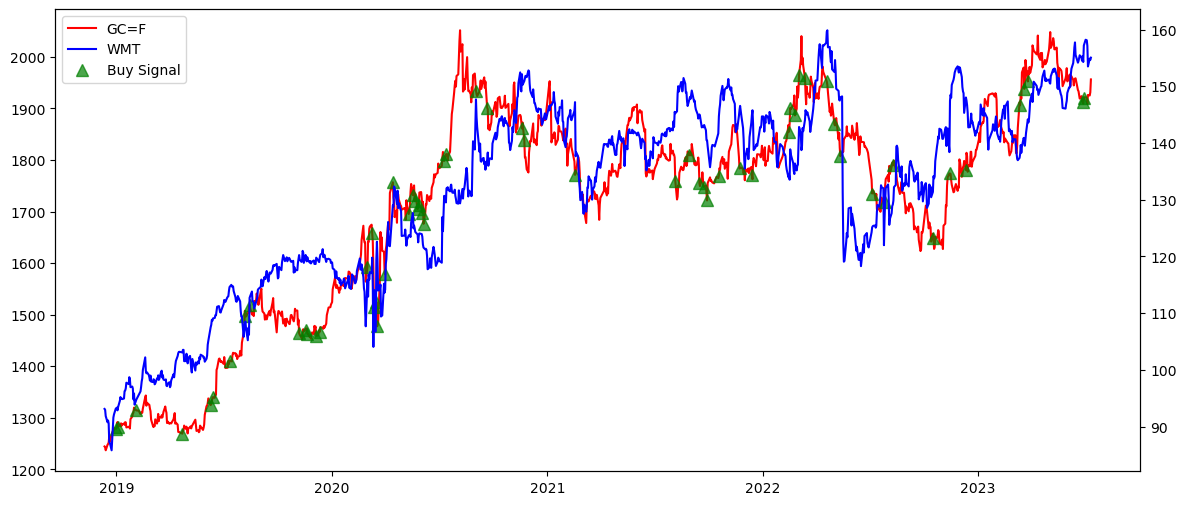

In [16]:
# visualize trading signals and position
fig=plt.figure(figsize=(14,6))
bx = fig.add_subplot(111)   
bx2 = bx.twinx()
#plot two different assets
l1, = bx.plot(signals['asset1'], c='r')
l2, = bx2.plot(signals['asset2'], c='b')
u1, = bx.plot(signals['asset1'][signals['positions1'] == 1], lw=0, marker='^', markersize=8, c='g',alpha=0.7)
bx.legend([l1,l2,u1], [asset1, asset2, 'Buy Signal'],loc='upper left')
plt.show()

In [17]:
# initial capital to calculate the actual pnl
initial_capital = 50000

# shares to buy for each position
positions1 = initial_capital// max(signals['asset1'])
positions2 = initial_capital// max(signals['asset2'])

# since there are two assets, we calculate each asset Pnl 
# separately and in the end we aggregate them into one portfolio
portfolio = pd.DataFrame()
portfolio['asset1'] = signals['asset1']
portfolio['holdings1'] = signals['positions1'].cumsum() * signals['asset1'] * positions1
portfolio['cash1'] = initial_capital - (signals['positions1'] * signals['asset1'] * positions1).cumsum()
portfolio['total asset1'] = portfolio['holdings1'] + portfolio['cash1']
portfolio['return1'] = portfolio['total asset1'].pct_change()
portfolio['positions1'] = signals['positions1']
# pnl for the 2nd asset
portfolio['asset2'] = signals['asset2']
portfolio['holdings2'] = signals['positions2'].cumsum() * signals['asset2'] * positions2
portfolio['cash2'] = initial_capital - (signals['positions2'] * signals['asset2'] * positions2).cumsum()
portfolio['total asset2'] = portfolio['holdings2'] + portfolio['cash2']
portfolio['return2'] = portfolio['total asset2'].pct_change()
portfolio['positions2'] = signals['positions2']

# total pnl and z-score
portfolio['z'] = signals['z']
portfolio['total asset'] = portfolio['total asset1'] + portfolio['total asset2']
portfolio['z upper limit'] = signals['z upper limit']
portfolio['z lower limit'] = signals['z lower limit']
portfolio['returns'] = portfolio['total asset'].pct_change()
portfolio = portfolio.dropna()

# calculate CAGR
final_portfolio = portfolio['total asset'].iloc[-1]
delta = (portfolio.index[-1] - portfolio.index[0]).days
print('Number of days = ', delta)
YEAR_DAYS = 252
returns = (final_portfolio/initial_capital) ** (YEAR_DAYS/delta) - 1
print('CAGR = {:.3f}%' .format(returns * 100))
print('Terminal Wealth = ', round(final_portfolio,2))

# Calculate the number of trades
num_trades = sum((portfolio['positions1'].shift() != portfolio['positions1']).astype(int))
# Display the number of trades
print('Number of trades = ', num_trades)

# Calculate the number of winning trades
num_winning_trades = sum(portfolio['returns'] > 0)
# Display the number of winning trades
print('Number of winning trades = ', num_winning_trades)
print('Win ratio = {:.2f}%'.format(num_winning_trades/num_trades*100))

# Calculate the gross profit and gross loss
gross_profit = sum(portfolio['returns'][portfolio['positions1'] == 1])
gross_loss = -sum(portfolio['returns'][portfolio['positions1'] == -1])
# Calculate the profit factor
profit_factor = gross_profit / gross_loss
# Display the profit factor
print('Profit Factor: ', round(profit_factor,2))

Number of days =  1671
CAGR = 20.093%
Terminal Wealth =  168359.44
Number of trades =  202
Number of winning trades =  183
Win ratio = 90.59%
Profit Factor:  -1.45


In [18]:
portfolio.tail()

,asset1,holdings1,cash1,total asset1,return1,positions1,asset2,holdings2,cash2,total asset2,return2,positions2,z,total asset,z upper limit,z lower limit,returns
Date,,,,,,,,,,,,,,,,,
2023-07-06,1908.699951,45808.798828,21533.609375,67342.408203,-0.003870,0.0,157.110001,-49018.32019,148485.911621,99467.591431,0.003147,0.0,-1.226103,166809.999634,1.0,-1.0,0.000302
2023-07-07,1926.199951,0.000000,67762.408203,67762.408203,0.006237,-1.0,153.490005,0.00000,100597.029907,100597.029907,0.011355,1.0,-0.712344,168359.438110,1.0,-1.0,0.009289
2023-07-10,1925.000000,0.000000,67762.408203,67762.408203,0.000000,0.0,154.880005,0.00000,100597.029907,100597.029907,0.000000,0.0,-0.866744,168359.438110,1.0,-1.0,0.000000
2023-07-11,1931.300049,0.000000,67762.408203,67762.408203,0.000000,0.0,154.649994,0.00000,100597.029907,100597.029907,0.000000,0.0,-0.790781,168359.438110,1.0,-1.0,0.000000
2023-07-12,1956.199951,0.000000,67762.408203,67762.408203,0.000000,0.0,155.039993,0.00000,100597.029907,100597.029907,0.000000,0.0,-0.625073,168359.438110,1.0,-1.0,0.000000


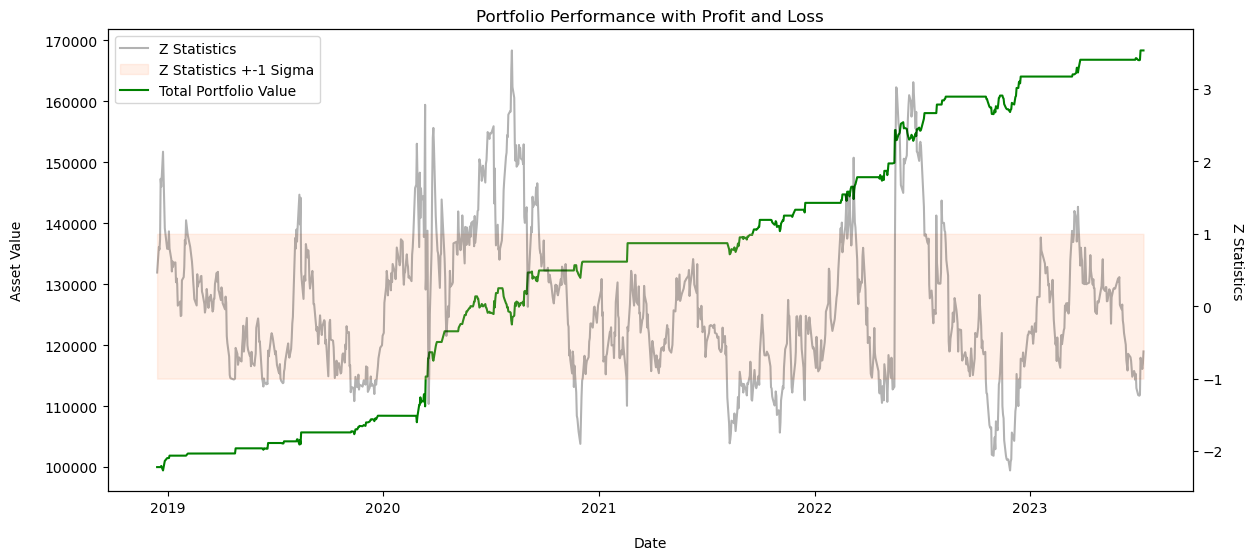

In [19]:
# plot the asset value change of the portfolio and pnl along with z-score
fig = plt.figure(figsize=(14,6),)
ax = fig.add_subplot(111)
ax2 = ax.twinx()
l1, = ax.plot(portfolio['total asset'], c='g')
l2, = ax2.plot(portfolio['z'], c='black', alpha=0.3)
b = ax2.fill_between(portfolio.index,portfolio['z upper limit'],\
                portfolio['z lower limit'], \
                alpha=0.2,color='#ffb48f')
ax.set_ylabel('Asset Value')
ax2.set_ylabel('Z Statistics',rotation=270)
ax.yaxis.labelpad=15
ax2.yaxis.labelpad=15
ax.set_xlabel('Date')
ax.xaxis.labelpad=15
plt.title('Portfolio Performance with Profit and Loss')
plt.legend([l2,b,l1],['Z Statistics',
                      'Z Statistics +-1 Sigma',
                      'Total Portfolio Value'],loc='upper left')
plt.show()

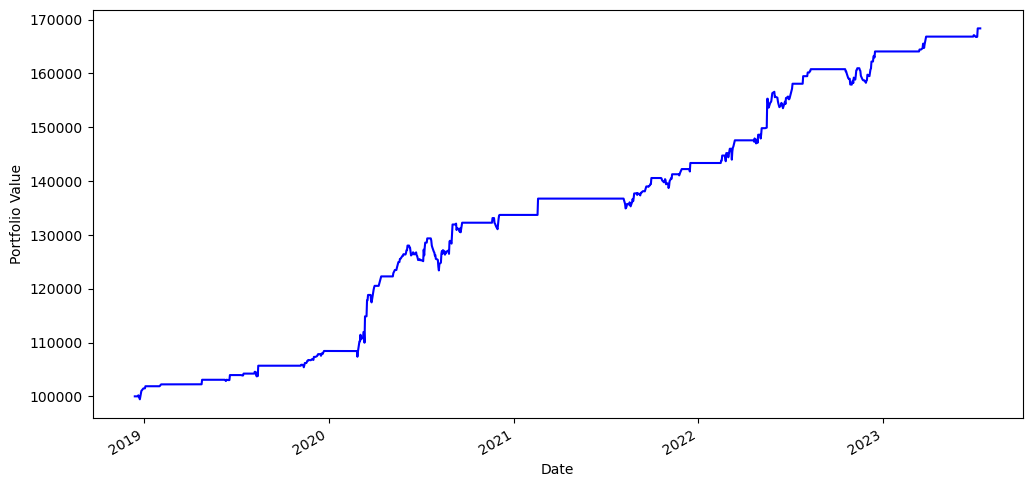

In [20]:
ax = portfolio['total asset'].plot(figsize=(12,6),color = "b")
ax.set_ylabel('Portfolio Value');

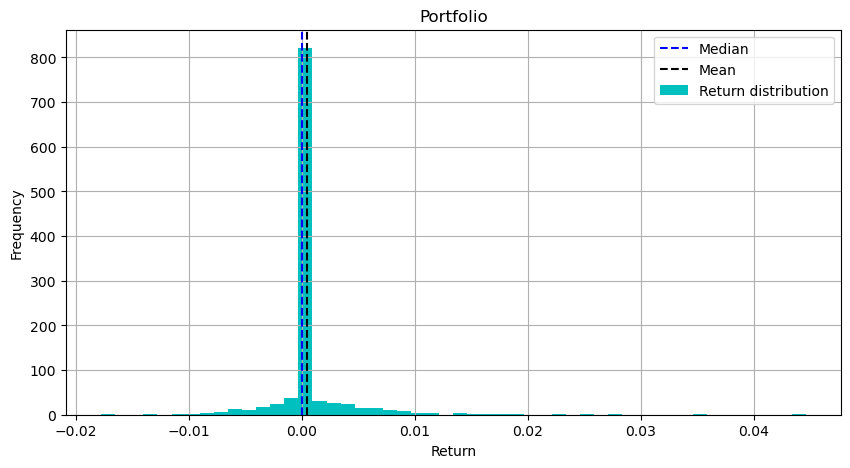

In [21]:
# Plot return distribution with median and mean for the Portfolio
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
plt.axvline(np.float64(portfolio['returns'].median()), color = "b", ls = "--")
plt.axvline(np.float64(portfolio['returns'].mean()), color = "k", ls = "--")
portfolio['returns'].hist(bins=50, ax=ax1, color = "c")
ax1.set_xlabel('Return')
ax1.set_ylabel('Frequency')
ax1.set_title('Portfolio')
plt.legend(["Median", "Mean", "Return distribution"]);

In [22]:
tbill_bt = merged_data['^TNX'].mean()/100
round(tbill_bt,4)

0.0207

In [23]:
def annualize_rets(r, periods_per_year):
    """
    Annualize a set of returns
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1


def annualize_vol(r, periods_per_year):
    """
    Annualize the volatility of a set of returns
    """
    return r.std()*(periods_per_year**0.5)


def drawdown (return_series: pd.Series):
    """
    Take a time series of asset returns and compute/return a DataFrame that contains:
    1. Wealth index
    2. Previous peaks
    3. Percent drawdowns
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks= wealth_index.cummax()
    drawdown = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks": previous_peaks,
        "Drawdown": drawdown
    })


def skewness(r):
    """
    Compute the skewness of the supplied Series/DataFrame
    Alternative to scipy.stats.skew()
    Return a float/Series
    """
    demeaned_r = r - r.mean()
    # Use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3


def kurtosis(r):
    """
    Compute the kurtosis of the supplied Series/DataFrame
    Alternative to scipy.stats.kurtosis()
    Return a float/Series
    """
    demeaned_r = r - r.mean()
    # Use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**4).mean()
    return exp/sigma_r**4


def var_historic (r, level=5):
    """
    Compute Value-at-Risk Historic
    """
    if isinstance(r,pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance (r,pd.Series):
        return -np.percentile(r,level)
    else: 
        raise TypeError("Expected r to be Series or DataFrame")


def var_gaussian(r, level=5, modified=False):
    """
    Return the Parametric Gaussian Value-at-Risk of a Series/DataFrame
    If "modified" is True, then the modified VaR is returned,
    using the Cornish-Fisher modification
    """
    # Compute the Z-score assuming it was Gaussian
    z = norm.ppf(level/100)
    if modified:
        # Modify the Z-score based on observed skewness and kurtosis
        s = skewness(r)
        k = kurtosis(r)
        z = (z +
                (z**2 - 1)*s/6 +
                (z**3 -3*z)*(k-3)/24 -
                (2*z**3 - 5*z)*(s**2)/36
            )
    return -(r.mean() + z*r.std(ddof=0))


def cvar_historic(r, level=5):
    """
    Compute the Conditional Value-at-Risk of Series/DataFrame
    """
    if isinstance(r, pd.Series):
        is_beyond = r <= -var_historic(r, level=level)
        return -r[is_beyond].mean()
    elif isinstance(r, pd.DataFrame):
        return r.aggregate(cvar_historic, level=level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")
        

def semideviation(r,periods_per_year=252):
    """
    Compute the Annualized Semi-Deviation
    """
    neg_rets = r[r<0]
    return annualize_vol(r = neg_rets, periods_per_year=periods_per_year)        
   

def rovar(r,periods_per_year,level=5):
    """
    Compute the Return on Value-at-Risk
    """
    return annualize_rets(r,periods_per_year=periods_per_year)/abs(var_historic(r,level=level))


def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Compute the annualized Sharpe Ratio of a set of returns
    """
    # Convert the annual risk-free rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol


def sortino_ratio(r, riskfree_rate, periods_per_year):
    """
    Compute the annualized Sortino Ratio of a set of returns
    """
    # Convert the annual risk-free rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    neg_rets = excess_ret[excess_ret<0]
    ann_vol = annualize_vol(neg_rets, periods_per_year)
    return ann_ex_ret/ann_vol


def calmar_ratio(r, riskfree_rate, periods_per_year):
    """
    Compute the annualized Calmar Ratio of a set of returns
    """
    # Convert the annual risk-free rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    max_dd = abs(drawdown(r).Drawdown.min())
    return ann_ex_ret/max_dd


def burke_ratio(r, riskfree_rate, periods_per_year, modified = False):
    """
    Compute the annualized Burke Ratio of a set of returns
    If "modified" is True, then the modified Burke Ratio is returned
    """
    # Convert the annual risk-free rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    sum_dwn = np.sqrt(np.sum((drawdown(r).Drawdown)**2))
    if modified == False:
        bk_ratio = ann_ex_ret/sum_dwn
    else:
        bk_ratio = ann_ex_ret/sum_dwn * np.sqrt(len(r))
    return bk_ratio


def summary_stats(r, riskfree_rate=np.float64(tbill_bt), periods_per_year=252):
    """
    Return a DataFrame that contains aggregated summary stats for the returns in the columns of r
    """
    ann_r = r.aggregate(annualize_rets, periods_per_year=periods_per_year)
    ann_vol = r.aggregate(annualize_vol, periods_per_year=periods_per_year)
    semidev = r.aggregate(semideviation, periods_per_year=periods_per_year)
    ann_sr = r.aggregate(sharpe_ratio, riskfree_rate=riskfree_rate, periods_per_year=periods_per_year)
    ann_cr = r.aggregate(calmar_ratio, riskfree_rate=riskfree_rate, periods_per_year=periods_per_year)
    ann_br = r.aggregate(burke_ratio, riskfree_rate=riskfree_rate, periods_per_year=periods_per_year, modified = True)
    ann_sortr = r.aggregate(sortino_ratio, riskfree_rate=riskfree_rate, periods_per_year=periods_per_year)
    dd = r.aggregate(lambda r: drawdown(r).Drawdown.min())
    skew = r.aggregate(skewness)
    kurt = r.aggregate(kurtosis)
    hist_var5 = r.aggregate(var_historic)
    cf_var5 = r.aggregate(var_gaussian, modified=True)
    hist_cvar5 = r.aggregate(cvar_historic)
    rovar5 = r.aggregate(rovar, periods_per_year=periods_per_year)
    return pd.DataFrame({
        "Annualized Return": round(ann_r,4),
        "Annualized Volatility": round(ann_vol,4),
        "Semi-Deviation": round(semidev,4),
        "Skewness": round(skew,4),
        "Kurtosis": round(kurt,4),
        "Historic VaR (5%)": round(hist_var5,4),
        "Cornish-Fisher VaR (5%)": round(cf_var5,4),
        "Historic CVaR (5%)": round(hist_cvar5,4),
        "Return on VaR": round(rovar5,4),
        "Sharpe Ratio": round(ann_sr,4),
        "Sortino Ratio": round(ann_sortr,4),
        "Calmar Ratio": round(ann_cr,4),
        "Modified Burke Ratio": round(ann_br,4),
        "Max Drawdown": round(dd,4)
    })

In [24]:
summary_stats(pd.DataFrame(portfolio['returns']))

,Annualized Return,Annualized Volatility,Semi-Deviation,Skewness,Kurtosis,Historic VaR (5%),Cornish-Fisher VaR (5%),Historic CVaR (5%),Return on VaR,Sharpe Ratio,Sortino Ratio,Calmar Ratio,Modified Burke Ratio,Max Drawdown
returns,0.1277,0.0563,0.0476,4.3341,43.9288,0.0029,-0.0032,0.0059,44.1189,1.8631,4.1476,2.2817,19.5217,-0.046
